In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson
from olac import utils
%matplotlib inline
%load_ext autoreload

%autoreload 2

from olac.utils import rotation_matrix
from olac import vis

from keras.models import Sequential
from keras.layers import Dense
import keras.layers as ly
from keras.layers import LSTM
from keras.layers import Flatten

Using TensorFlow backend.


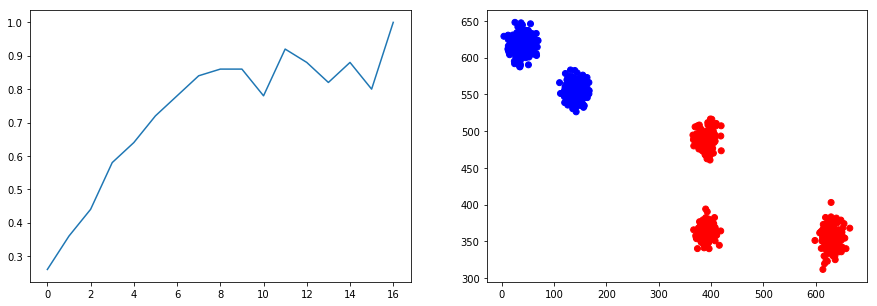

In [2]:
model = Sequential()
model.add(ly.Dense(units=12, activation='relu', input_dim=2))
model.add(ly.Dense(units=6, activation='relu'))
model.add(ly.Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

from olac import data_generators

X_train, y_train = np.split(np.vstack(list(data_generators.cluster_generator())),[2],1)
X_test, y_test = np.split(np.vstack(list(data_generators.cluster_generator())),[2],1)
training_end = 200
model_hist = model.fit(X_train[:,:training_end], y_train[:,:training_end].astype(int), epochs=100, batch_size=20, verbose=0)
print(model_hist)
step_size = 50
steps = np.arange(training_end, len(X_train), step_size)
acc_list = []
for step in steps:
    prediction = np.round(model.predict(X_train[step : step+step_size]))
    model_hist = model.train_on_batch(X_train[step:step+step_size], y_train[step:step+step_size])
    acc = (prediction == y_train[step:step+step_size]).mean()
    acc_list.append(acc)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
ax1.plot(acc_list)
ax2.scatter(X_train[:, 0], X_train[:,1], color=[{0: 'r', 1: 'b', 2: 'b'}[n.item()] for n in y_train])

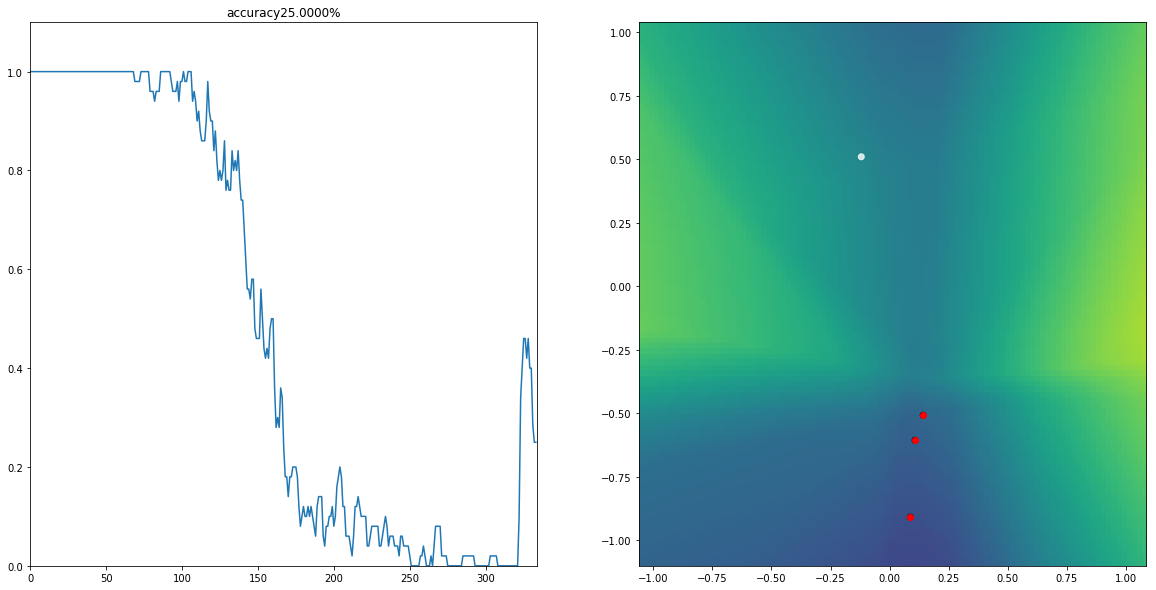

In [4]:
vis.main(model, data_generators.roving_balls, 'accuracy', steps=4000, p_train=10, window=50, period=4000)

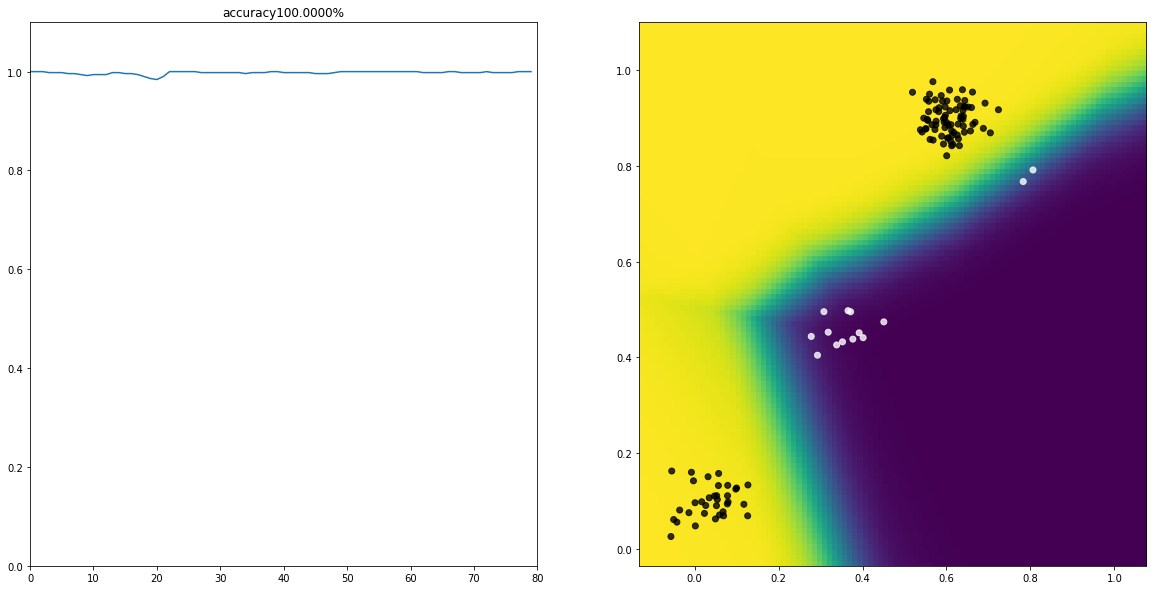

In [5]:
vis.main(model, data_generators.cluster_generator, 'accuracy', n_points=10000, cluster_width=50, p_train=10, window=500)